# monogram1-week8
# Linear Regression with Python


با استفاده از دیتاست داده شده مدل ماشین لرنینگ بدست آورید که قیمت خانه را با در نظر گرفتن مشخصات آن پیش بینی کند.


data set: USA_Housing.csv.

The data contains the following columns: ستونهای دیتاست به شرح زیر میباشد.

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.درآمد متوسط ساکنان منطقه
* 'Avg. Area House Age': Avg Age of Houses in same city  عمرمتوسط خانه ها 
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city متوسط مساحت اتاقهای هر خانه
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city متوسط مساحت اتاق خوابهای هر خانه
* 'Area Population': Population of city house is located in جمعیت شهر
* 'Price': Price that the house sold at قیمت فروخته شده هر خانه
* 'Address': Address for the house آدرس هر خانه

**Let's get started!**

### Import Libraries کتابخانه های مورد نیاز را ایمپورت کنید

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [4]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [5]:
USAhousing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [6]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA (Exploratory Data Analysis)
با این کار دیتاست را بررسی میکنیم تا ببینیم چه اطلاعاتی میتوانیم بدست آوریم

Let's create some simple plots to check out the data!

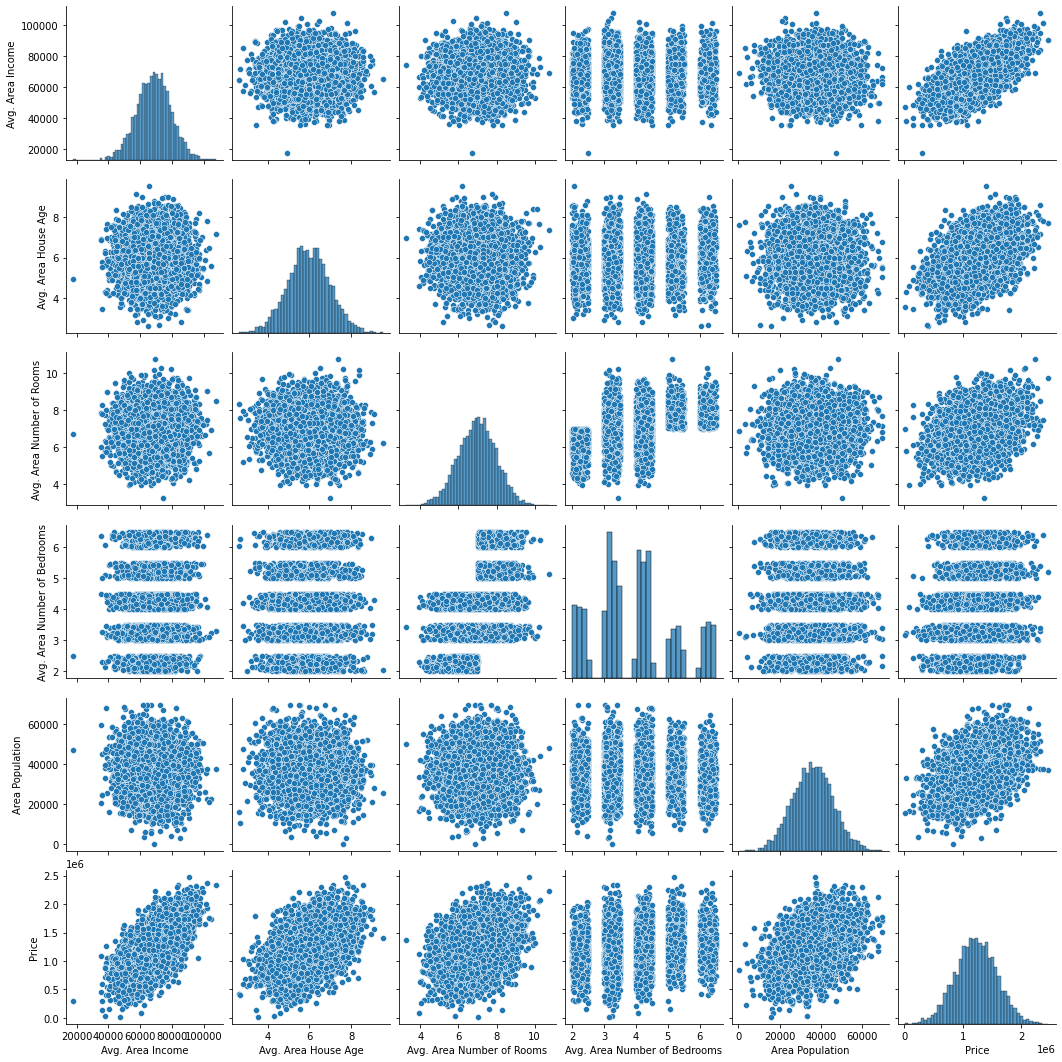

In [10]:
sns.pairplot(USAhousing)

C:\Users\monah\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

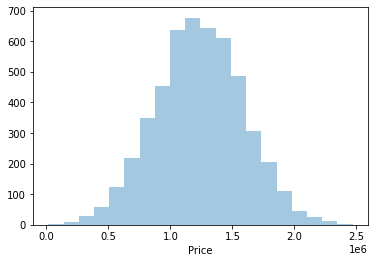

In [17]:
sns.distplot(USAhousing['Price'],bins=20,kde=False)

C:\Users\monah\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

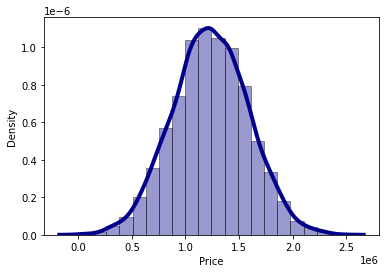

In [13]:
sns.distplot(USAhousing['Price'], hist=True, kde=True, bins=20, color = 'darkblue',
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})


## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [19]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 101)

In [23]:
print('X_train',X_train )

X_train       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
1303      68091.179676             5.364208                   7.502956   
1051      75729.765546             5.580599                   7.642973   
4904      70885.420819             6.358747                   7.250241   
931       73386.407340             4.966360                   7.915453   
4976      75046.313791             5.351169                   7.797825   
...                ...                  ...                        ...   
4171      56610.642563             4.846832                   7.558137   
599       70596.850945             6.548274                   6.539986   
1361      55621.899104             3.735942                   6.868291   
1547      63044.460096             5.935261                   5.913454   
4959      75078.791516             7.644779                   8.440726   

      Avg. Area Number of Bedrooms  Area Population  
1303                          3.10     44557.3796

In [22]:
print('X_train',X_train )
print('X_test',X_test) 
print('y_train',y_train)
print('y_test',y_test)

X_train       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
1303      68091.179676             5.364208                   7.502956   
1051      75729.765546             5.580599                   7.642973   
4904      70885.420819             6.358747                   7.250241   
931       73386.407340             4.966360                   7.915453   
4976      75046.313791             5.351169                   7.797825   
...                ...                  ...                        ...   
4171      56610.642563             4.846832                   7.558137   
599       70596.850945             6.548274                   6.539986   
1361      55621.899104             3.735942                   6.868291   
1547      63044.460096             5.935261                   5.913454   
4959      75078.791516             7.644779                   8.440726   

      Avg. Area Number of Bedrooms  Area Population  
1303                          3.10     44557.3796

## Creating and Training the Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [16]:
# print the intercept
print(lm.intercept_)

-2640159.7968525267


In [17]:
# print the coefficients
print(lm.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


در خط پایین میخواهیم ضرایب در یک دیتافریم نمایش داده شود.

In [18]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [38]:
predictions = lm.predict(X_test)

In [39]:
predictions

array([1260960.70567627,  827588.75560334, 1742421.2425434 , ...,
        372191.40626923, 1365217.15140897, 1914519.5417887 ])

# Single Sample Prediction
میخواهیم فقط مشخصات یک خانه را بدهیم و قیمت را ببینیم

In [72]:
my_sample=[68500,5.9,6.9,3.4,3600]
sample_array = np.array(my_sample).reshape(1,-1)
sample_array

array([[6.85e+04, 5.90e+00, 6.90e+00, 3.40e+00, 3.60e+03]])

In [73]:
Price= lm.predict(sample_array)
print('price is:',Price)

price is: [713818.7575046]


C:\Users\monah\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# مقایسه ایگرگ های تست و مقدار پیش بینی شده

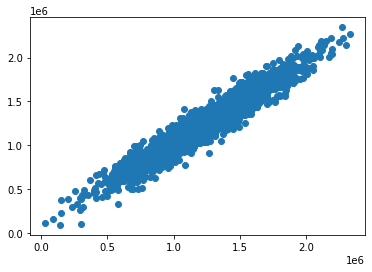

In [20]:
plt.scatter(y_test,predictions)

**Residual Histogram**

C:\Users\monah\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


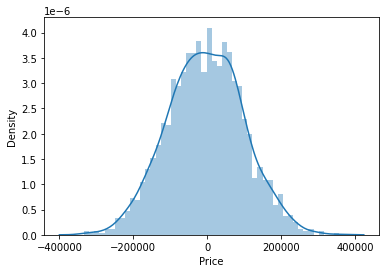

In [32]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [33]:
from sklearn import metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914947
MSE: 10460958907.209059
RMSE: 102278.82922290936


This was your first real Machine Learning Project! Congrats!

## Great Job!